In [ ]:
# 필요한 라이브러리 설치
!pip install pandas numpy matplotlib pmdarima yfinance

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import yfinance as yf  # 비트코인 가격 데이터를 가져오기 위한 라이브러리

In [ ]:
# 데이터 수집 (비트코인 가격 데이터 다운로드)
df = yf.download("BTC-USD", start="2015-01-01", end="2024-12-31")  # 비트코인 달러 시세
df = df[['Close']]  # 종가(Close)만 사용
df.rename(columns={'Close': 'Price'}, inplace=True)
df.index = pd.to_datetime(df.index)  # 날짜를 datetime 형식으로 변환

[*********************100%***********************]  1 of 1 completed


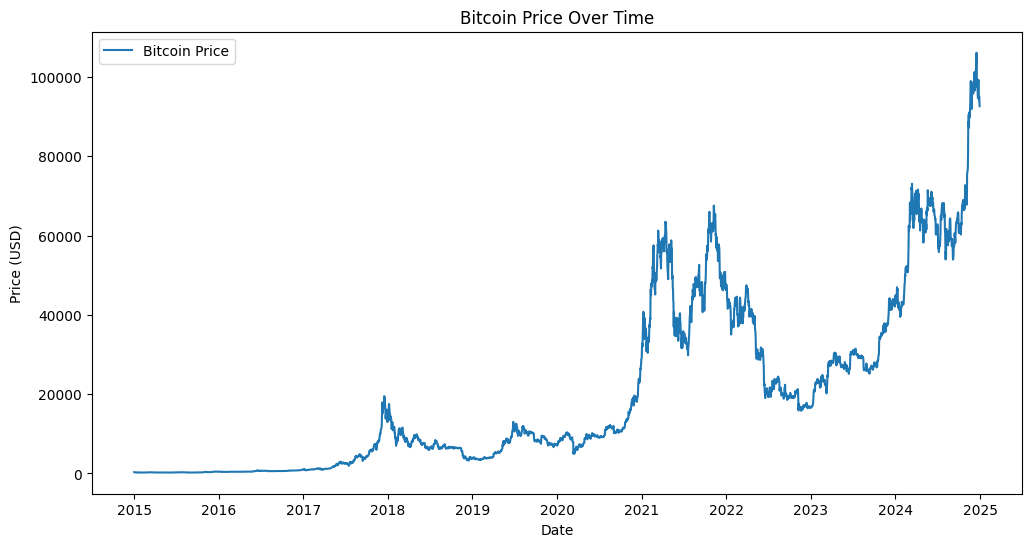

In [ ]:
# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label="Bitcoin Price")
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
# 데이터 분리 (훈련 데이터와 테스트 데이터)
train = df.loc[:'2022-12-31']  # 2022년까지 훈련 데이터
test = df.loc['2023-01-01':]  # 2023년 이후 테스트 데이터

# ARIMA 모델 하이퍼파라미터 탐색 (훈련 데이터만 사용)
stepwise_model = auto_arima(train,
                            start_p=1, start_q=1,
                            max_p=3, max_q=3,
                            m=12,  # 계절성 주기 설정 (1년 단위는 m=12)
                            seasonal=True,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=32.84 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=49423.099, Time=0.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=48316.521, Time=7.60 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.94 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=49419.966, Time=0.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=48069.358, Time=15.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=33.74 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=12.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=48069.243, Time=2.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=48314.783, Time=0.86 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=20.51 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=7.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=48069.341, Time=14.75 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=43.43 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=48071.155, Time=19.33 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 218.486 seconds


In [ ]:
# 모델 요약 출력
print(stepwise_model.summary())

# 모델 훈련 (훈련 데이터에 적합)
stepwise_model.fit(train)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2922
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -24031.621
Date:                            Wed, 08 Jan 2025   AIC                          48069.243
Time:                                    00:58:04   BIC                          48087.169
Sample:                                01-01-2015   HQIC                         48075.701
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7237      0.008    -89.774      0.000      -0.739      -0.708
ar.S.L24      -0.2850      0.009   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# 테스트 데이터에 대한 예측 수행
n_periods = len(test)  # 예측할 기간 수 (테스트 데이터 기간)
forecast = stepwise_model.predict(n_periods=n_periods)
forecast_index = test.index

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


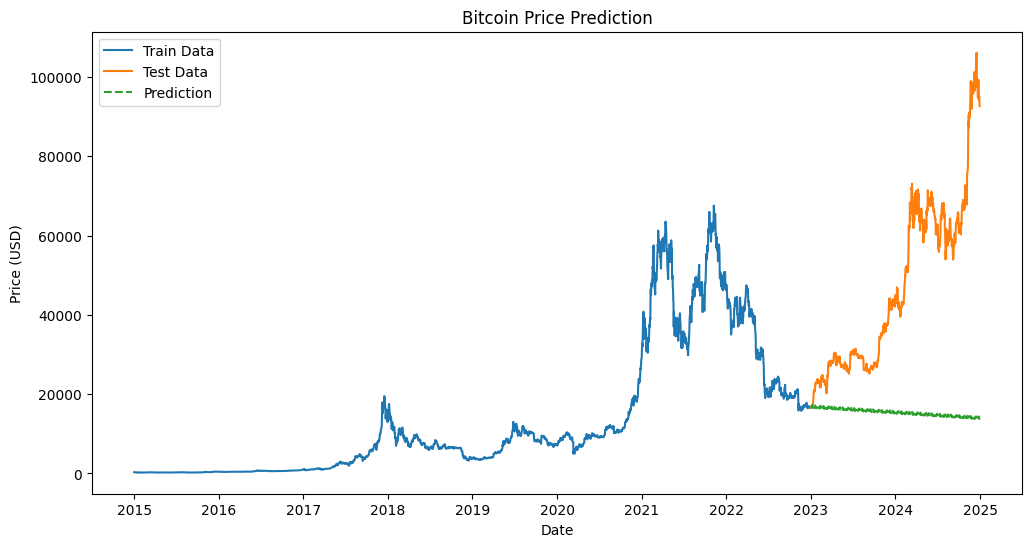

In [ ]:
# 예측값을 데이터프레임으로 정리
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Prediction'])

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label="Train Data")
plt.plot(test.index, test['Price'], label="Test Data")
plt.plot(forecast_df.index, forecast_df['Prediction'], label="Prediction", linestyle='--')
plt.title("Bitcoin Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터와 예측 데이터 병합 (결과 확인용)
result = pd.concat([test, forecast_df], axis=1)
print(result.head())

            (Price, BTC-USD)    Prediction
Date                                      
2023-01-01      16625.080078  16829.096227
2023-01-02      16688.470703  16754.953117
2023-01-03      16679.857422  16691.778497
2023-01-04      16863.238281  16736.662319
2023-01-05      16836.736328  17001.743708
